In [1]:
import matplotlib.pyplot as plt         
from tabulate import tabulate           
import matplotlib as mat              
import seaborn as sns                 
import pandas as pd                       
import numpy as np        

In [2]:
df=pd.read_csv('data3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [122]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [13]:
t1=df[df['total (R$)']<(df['total (R$)'].quantile(0.75)+1.5*df['total (R$)'].std())]

## First we are going to explore the distribution of rent by city

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'São Paulo'),
  Text(1, 0, 'Porto Alegre'),
  Text(2, 0, 'Rio de Janeiro'),
  Text(3, 0, 'Campinas'),
  Text(4, 0, 'Belo Horizonte')])

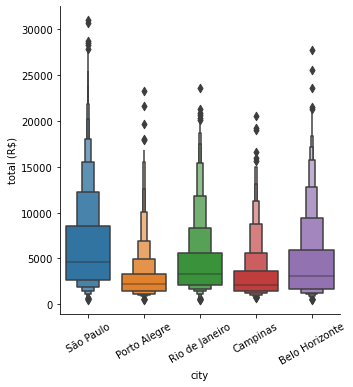

In [14]:
sns.catplot(data=t1,x='city',y='total (R$)',kind='boxen')
plt.xticks(rotation=30)

#### We can see that although the mean total rental expense for all cities lies between 3000 and 5000 there is large disparity in the range for the rent, the number of houses within any given range and the number of outliers(very expensive or very affordable houses).

## A peek into property tax city-wise

In [27]:
t2=df[df['property tax (R$)']<(df['property tax (R$)'].quantile(0.75)+1.5*df['property tax (R$)'].std())]
t2['tax rate']=t2['property tax (R$)']/t2['total (R$)']*100

C:\Users\saiki\AppData\Local\Temp\ipykernel_6296\687327367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['tax rate']=t2['property tax (R$)']/t2['total (R$)']*100


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'São Paulo'),
  Text(1, 0, 'Porto Alegre'),
  Text(2, 0, 'Rio de Janeiro'),
  Text(3, 0, 'Campinas'),
  Text(4, 0, 'Belo Horizonte')])

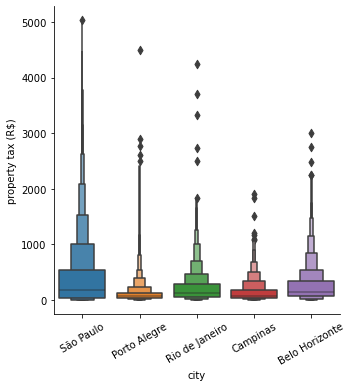

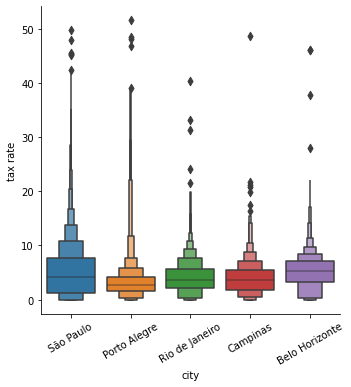

In [43]:
sns.catplot(data=t2,x='city',y='property tax (R$)',kind='boxen')
plt.xticks(rotation=30)
sns.catplot(data=t2,x='city',y='tax rate',kind='boxen')
plt.xticks(rotation=30)

#### Although the mean tax is around 300 for every city there is a large disparity in tax paid as well as the tax rate,for a very few number of properties, tax accounts for around half of the rent.A large portion of the population in all cities pays less than 10% property tax.

## A quick look at the rent distribution in Brazil

<AxesSubplot:xlabel='total (R$)', ylabel='Count'>

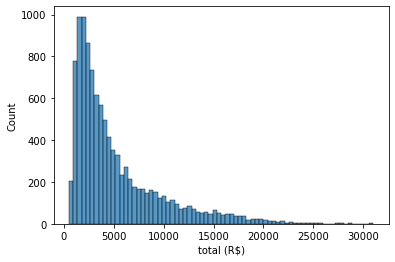

In [29]:
sns.histplot(t1,x='total (R$)')

#### A very large proportion of the population pays between 1000 and 3000 as total rent; with households severly dropping in number as the total rent rises above 20000.

## Let's check if there is a disparity in rent by the number of bedrooms with and without a pet.

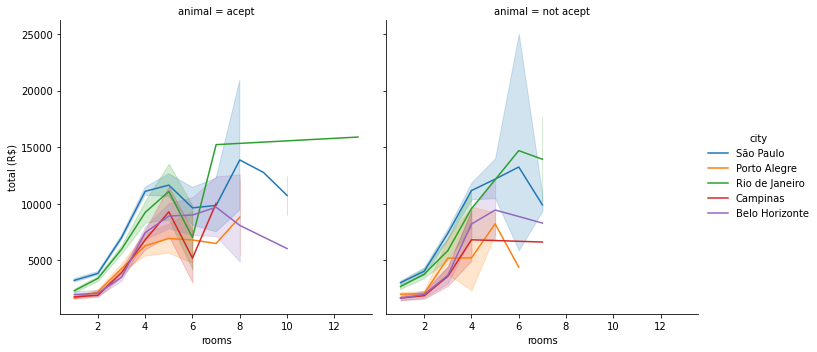

In [32]:
sns.relplot(data=t1,x='rooms',y='total (R$)',hue='city',col='animal',kind='line')

#### We can see that a large homes do not mind an tenant with an animal.There's a wider choice in price of homes available for every size(number of rooms), when the tenant doesn't have a pet.

## Variation of rent with number of parking spaces by city

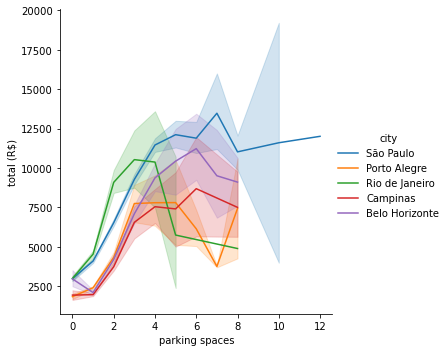

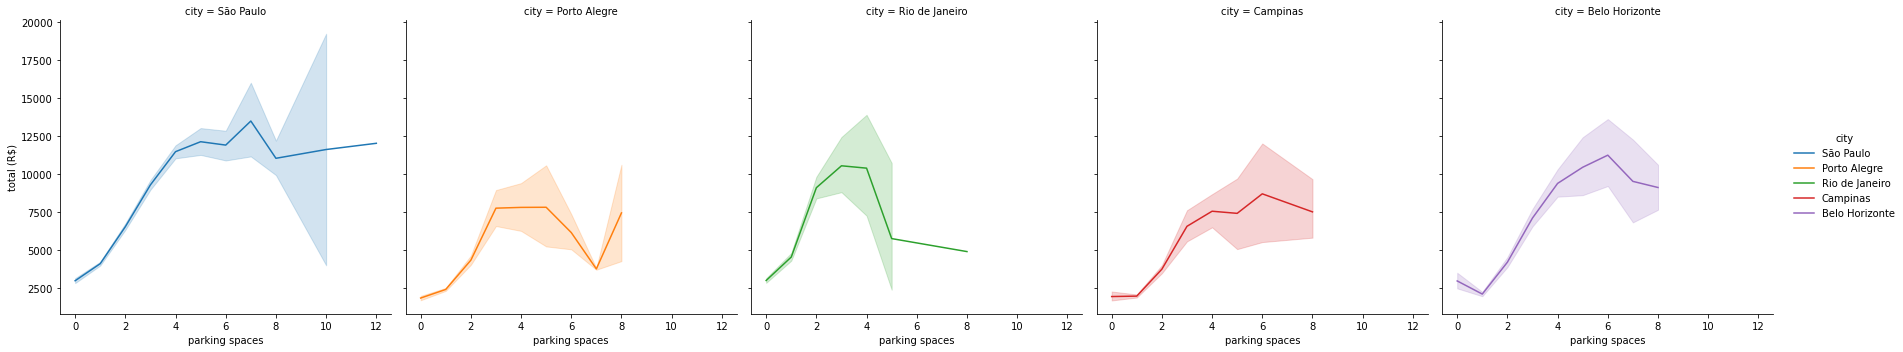

In [38]:
sns.relplot(data=t1,x='parking spaces',y='total (R$)',hue='city',kind='line')
sns.relplot(data=t1,x='parking spaces',y='total (R$)',hue='city',col='city',kind='line')

#### We can see that in all the cities the minum and maximum rent increase upto 4 parking spaces.In Sao Paulo the range of rent is large for people who need 10 parking spaces,in Porto Alegre same applies for 3-5 parking spaces,in Rio de Janerio that stat hovers between 2 and 5,in campinas there's a large selection in prices for 3-8 parking spaces and in Belo Horizonte there's a good price selection for 4-8 parking spaces.

## The availability of houses by price range depending on whether it is furnished and/or pet is allowed or not.

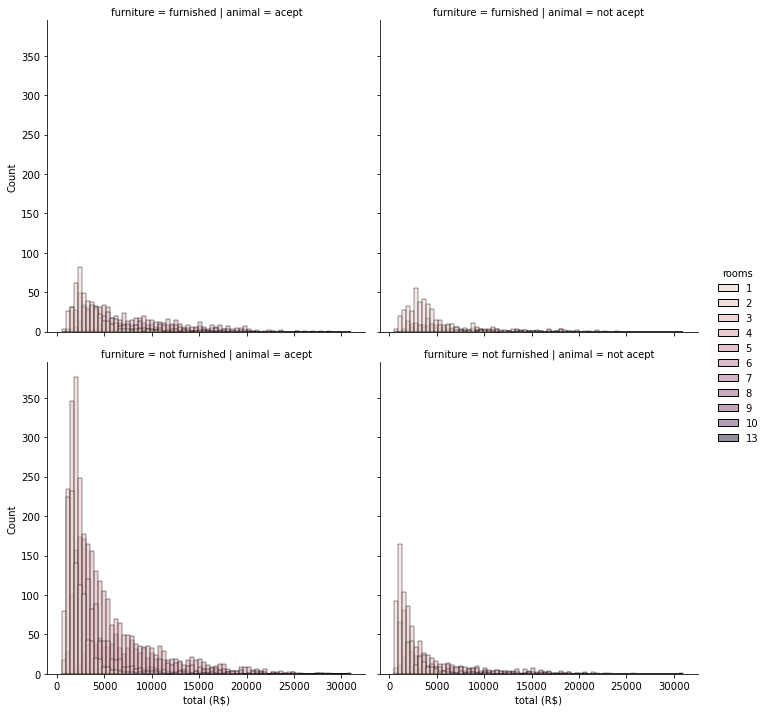

In [87]:
sns.displot(data=t1,x='total (R$)',row='furniture',col='animal',hue='rooms')

#### We can see that there is a large number of homes in which animals are accepted and are not furnished and it drops lower in almost all price ranges when both animals are accepted and is furnished.The number of homes in Brazil that don't allow pets and are furnished seem to be lowest in number across all price ranges,closely followed by homes that are not furnished as well as don't allow pets.

## The relation between number of rooms and fire insurance

In [48]:
da=df[df['area']<(df['area'].quantile(0.75)+1.5*df['area'].std())]

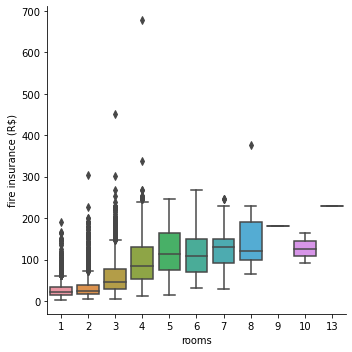

In [61]:
sns.catplot(data=da,x='rooms',y='fire insurance (R$)',kind='box')

#### We can see that the average fire insurance increases as the number of rooms increase upto 5 and the average stagnates after that even as number of rooms increase even though the range of the price of fire insurance increases gradually along with minimum and maximum.

## An outlook on prices of furnished and unfurnished homes against number of rooms.

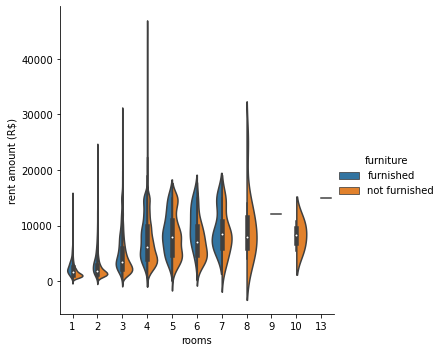

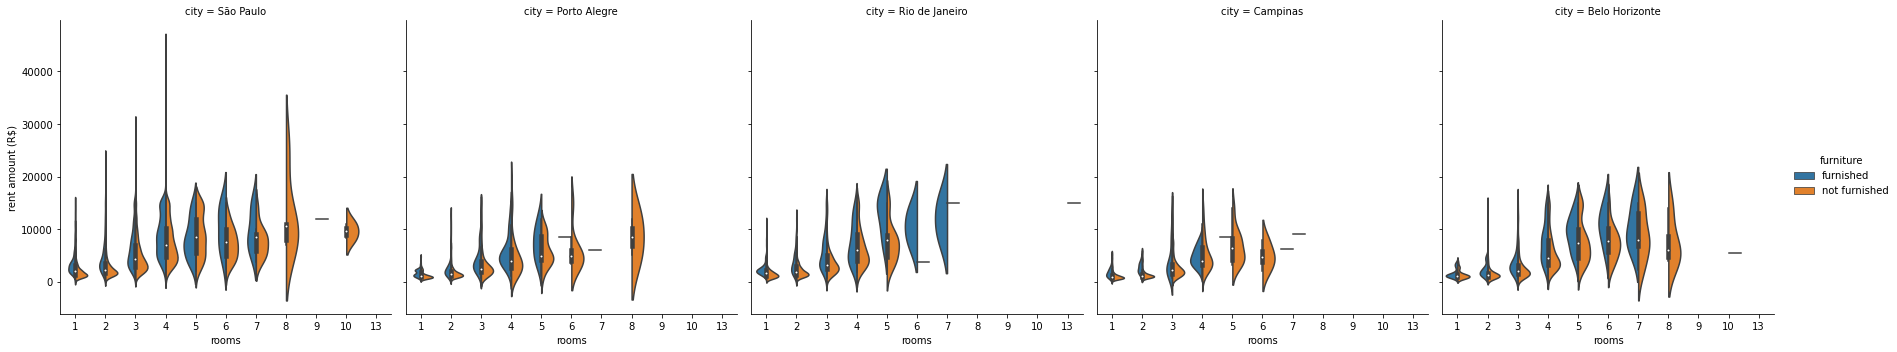

In [81]:
sns.catplot(data=df,x='rooms',y='rent amount (R$)',hue='furniture',split=True,kind='violin')
sns.catplot(data=df,x='rooms',y='rent amount (R$)',hue='furniture',split=True,kind='violin',col='city')

#### When looking at Brazil as a whole there is clear trend in the increase of prices as we move away from unfurnished to furnished homes and the range and average increase as the number of rooms increase up until 4, where an intresting phenomenon occurs,the price ranges of and distribution of houses with 4,5,6  and 7 rooms is very similar.There is a dearth of furnished homes as we move past 8 rooms.When we look at the graphs the distribution of in Sao Paulo seems to be very similar to that of entire Brazil which leads one to believe there's a large proportion of homes in Brazil are situated in Sao Paulo.

([<matplotlib.patches.Wedge at 0x1817afaad00>,
 [Text(-0.1741206206333844, 1.0861316722526073, 'São Paulo'),
  Text(-0.7981121055985749, -0.7569789078283551, 'Rio de Janeiro'),
  Text(-0.0012929805360998223, -1.0999992400912528, 'Belo Horizonte'),
  Text(0.7244901995536152, -0.8277161051657526, 'Porto Alegre'),
  Text(1.0656308763556428, -0.27282015203702464, 'Campinas')])

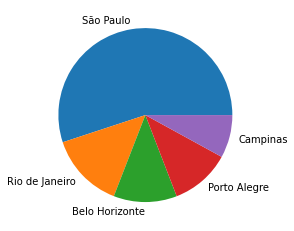

In [108]:
plt.pie(df.city.value_counts(),labels=['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre',
       'Campinas'])

## The number of dwellings available based on the floor in every city.

<AxesSubplot:xlabel='floor', ylabel='Count'>

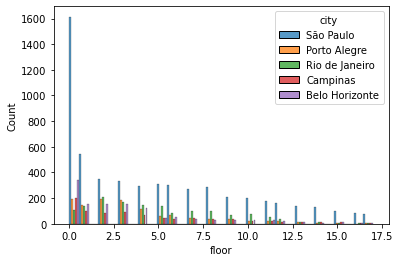

In [113]:
tf=df[df['floor']<(df['floor'].quantile(0.75)+1.5*df['floor'].std())]
sns.histplot(tf,x='floor',hue='city',multiple='dodge')

#### Sao Paulo has a lot of highrises as the number of houses available as: as the floors increase there are the number of houses available in other cities pale in comparision to Sao Paulo. 